<a href="https://colab.research.google.com/github/tcruz88/CNN_project/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import os
import cv2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


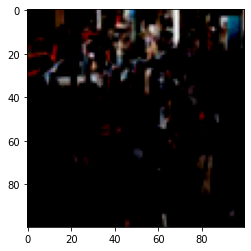

[1. 0.]


In [2]:
#image data shape (n, width, height, rgb value)

X = [] # Images
Y = [] # Categories

folder_pedestrian = 'pedestrian'
folder_road = 'road'

name_encode = {"pedestrian":0, "road":1}

def images_to_array(folder, name):
    for image in os.listdir(folder):
        loaded_image = Image.open(os.path.join(folder, image))  #loading image
        resized_image = Image.Image.resize(loaded_image, [100,100]) #resize image to 100 x 100 px
        image_array = np.array(resized_image) # transform image into an array
        X.append(image_array) # append images to array X
        Y.append(name_encode[name]) #append category

        image_flipped = cv2.flip(image_array,1) #create copies of images flipped horizontally to improve model accuracy
        X.append(image_flipped)
        Y.append(name_encode[name])

        image_blurred = cv2.blur(image_array,(2,2)) #create copies of images blurred to improve accuracy
        X.append(image_blurred)
        Y.append(name_encode[name])

        image_flipped_blurred = cv2.blur(image_flipped,(2,2)) #create copies of images flipped horizontally & blurred to improve accuracy
        X.append(image_flipped_blurred)
        Y.append(name_encode[name])

def show_image(index):
    plt.imshow(X[index])
    plt.show()
    print(Y[index])

images_to_array(folder_pedestrian, "pedestrian")
images_to_array(folder_road, "road")

Y = to_categorical(Y, num_classes=2)
X = (np.array(X) - 127.5) / 127.5 #normalization of data

show_image(6)


In [3]:
from keras.layers import Activation, Conv2D, Dense, Flatten, MaxPool2D, BatchNormalization, Dropout
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (5,5), padding='same',activation='relu', input_shape=(100,100,3) ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(100, (5,5), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5)) # muting half of trainable parameters
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(100, (5,5), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5)) 
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(124))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 100)       80100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 100)       400       
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 100)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 100)       0

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.1)

print(X[5])

[[[ 0.60784314  0.56078431  0.49019608]
  [ 0.41960784  0.3254902   0.27058824]
  [-0.50588235 -0.59215686 -0.62352941]
  ...
  [-1.         -1.         -0.96078431]
  [-0.95294118 -0.96078431 -0.91372549]
  [-0.81960784 -0.82745098 -0.78039216]]

 [[ 0.60784314  0.56078431  0.4745098 ]
  [ 0.52156863  0.42745098  0.35686275]
  [-0.33333333 -0.38039216 -0.41176471]
  ...
  [-0.97647059 -0.98431373 -0.9372549 ]
  [-0.95294118 -0.96078431 -0.91372549]
  [-0.81960784 -0.82745098 -0.78039216]]

 [[ 0.63137255  0.58431373  0.48235294]
  [ 0.4745098   0.38039216  0.33333333]
  [-0.11372549 -0.08235294 -0.08235294]
  ...
  [-0.8745098  -0.88235294 -0.83529412]
  [-0.95294118 -0.96078431 -0.91372549]
  [-0.81176471 -0.81960784 -0.77254902]]

 ...

 [[-0.35686275 -0.43529412 -0.42745098]
  [-0.38823529 -0.45098039 -0.43529412]
  [-0.45098039 -0.49803922 -0.46666667]
  ...
  [-0.58431373 -0.63137255 -0.6       ]
  [-0.6        -0.64705882 -0.61568627]
  [-0.61568627 -0.6627451  -0.63137255]]

 [

Epoch 1/10
36/36 [==============================] - 26s 708ms/step - loss: 1.6743 - acc: 0.8777 - val_loss: 3.2120 - val_acc: 0.4750
Epoch 2/10
36/36 [==============================] - 25s 694ms/step - loss: 0.2036 - acc: 0.9628 - val_loss: 4.3995 - val_acc: 0.4500
Epoch 3/10
36/36 [==============================] - 25s 696ms/step - loss: 0.2203 - acc: 0.9612 - val_loss: 9.9669 - val_acc: 0.4500
Epoch 4/10
36/36 [==============================] - 25s 695ms/step - loss: 0.0570 - acc: 0.9825 - val_loss: 13.9154 - val_acc: 0.4500
Epoch 5/10
36/36 [==============================] - 25s 699ms/step - loss: 0.1628 - acc: 0.9782 - val_loss: 15.9955 - val_acc: 0.4500
Epoch 6/10
36/36 [==============================] - 25s 698ms/step - loss: 0.0075 - acc: 0.9982 - val_loss: 12.9171 - val_acc: 0.4500
Epoch 7/10
36/36 [==============================] - 25s 696ms/step - loss: 0.1107 - acc: 0.9861 - val_loss: 6.4198 - val_acc: 0.6000
Epoch 8/10
36/36 [==============================] - 25s 697ms/step

Text(0, 0.5, 'Accuracy')

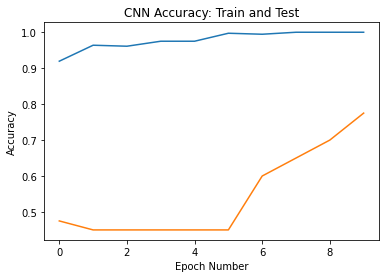

In [5]:
from keras.optimizers import Adam

optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])
h = model.fit(X_train, y_train, batch_size=10, epochs=10, validation_data=(X_test,y_test))
model.save('road_pedestrian_CNN.h5')

plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.title("CNN Accuracy: Train and Test")
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
Prediction: road


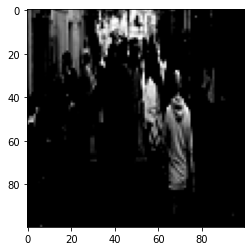

In [6]:
from keras.models import load_model

model = load_model('road_pedestrian_CNN.h5')

def prediction(index_number):
  img = (np.array(X[index_number]) - 127.5) / 127.5 
  img = img.reshape(1,100,100,3) # (n number of images, h, w, rgb)
  prediction = model.predict_classes(img)
  print(prediction[0])
  if prediction == 0:
    print('Prediction: pedestrian')
  elif prediction == 1:
    print('Prediction: road')
  else:
    print('Prediction: Error')
  plt.imshow(X[index_number])
  plt.show

prediction(9)
# Pedestrian = 0, Road = 1